# Homework 2 Part 1

**1.** For this question, your goal is to apply principal component analysis on a collection of face images. Download the image files face.zip from D2L. After unzipping the file, you should find 20 image files (denoted as pict1,..., pict10, face1, ..., face10).

**a.** Load the image files into a dataframe object named imgData. The dataframe should contain 20 rows and 97200 columns. Plot the images. Observe that there are 4 groups of images (emojis, paintings, male celebrities and female celebrities). 

**Solution:**

imgData size =(20, 97200)


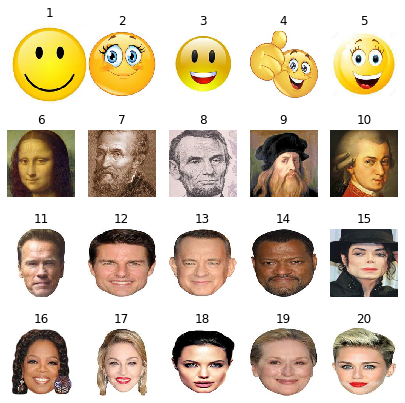

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 20
fig = plt.figure(figsize=(7,7))
img = mpimg.imread('faces/pict1.jpg')
imgData = np.array(img.flatten()).reshape(1,97200)
ax = fig.add_subplot(4,4,1)
plt.imshow(img)
plt.axis('off')
ax.set_title('1')

for i in range(1,numImages):
    filename = 'faces/pict'+str(i+1)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,5,i+1)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i+1))
    data = np.array(img.flatten()).reshape(1,97200)
    imgData = np.concatenate((imgData,data),axis=0)
    
print('imgData size =' + str(imgData.shape))

**b.** Apply principal component analysis to reduce the dimensionality of the data to 2. Store the projected values of the images in a dataframe and display their values. Draw a scatter plot with different colors representing each group of images (e.g., yellow for all emojis, red for paintings, blue for males, and green for female celebrities). 

**Solution:**

,pc1,pc2
1,-16906.772052,-9447.786036
2,-12922.378252,-6914.760871
3,-18710.495433,-8459.922277
4,-15203.111309,-9178.770978
5,-18363.276793,-9494.348785
6,24091.751359,-6773.901893
7,15798.121949,-11993.494958
8,-1817.965764,-1654.599968
9,22124.658724,-2511.412466
10,24029.897339,-11528.415074


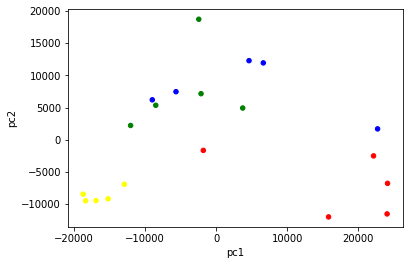

In [2]:
import pandas as pd
from sklearn.decomposition import PCA

colors = ['yellow','yellow','yellow','yellow','yellow','red','red','red','red','red','blue','blue','blue','blue','blue',
         'green','green','green','green','green']

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected.plot(kind='scatter',x='pc1',y='pc2', c=colors)
projected

**c.** Reshape the first two principal components into their corresponding 3-dimensional matrices of size 180 x 180 x 3. Plot their resulting images. Note that you will need to rescale the principal component values to range from [0,255] and convert them from float to uint8 before plotting the images using imshow. 

For example, if x = [-4 -2 1 0 4 6], then we can convert the values in x to a range between [0, 255] as follows:

        x = (x - min(x))/(max(x) - min(x)) * 255

Text(0.5, 1.0, '2nd pc')

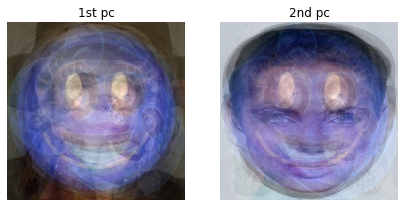

In [3]:
x = pca.components_[0]
x = (x - min(x)) / (max(x) - min(x)) * 255
x = x.reshape((180,180,3)).astype('uint8')

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,2,1)
plt.imshow(x)
plt.axis('off')
ax.set_title('1st pc')

x2 = pca.components_[1]
x2 = (x2 - min(x2)) / (max(x2) - min(x2)) * 255
x2 = x2.reshape((180,180,3)).astype('uint8')

ax = fig.add_subplot(1,2,2)
plt.imshow(x2)
plt.axis('off')
ax.set_title('2nd pc')

**2.** Consider the Misra-Gries algorithm presented in class for finding "hot" (frequent) items from a data stream.

**a.** Assume the stream consists of the following sequence of Twitter hashtags arriving one after another:

|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:
|#flu| #vaccine | #health | #flu | #sick | #health | #flu | #health | #sick | #vaccine | #vaccine | #patient | #sick | #vaccine | #sick

Suppose the size of the associative array used by the Misra-Gries algorithm is $k-1=3$. 

- Show the content of the associative array after processing the first five hashtags of the data stream using the Misra-Gries algorithm. Make sure you record the items stored in the associative array along with their frequency values.

**Solution:**

Content of the array after processing the first 5 hashtags using the Misra-Gries algorithm is:

| Hashtag | Count 
|:--|:-:
| #flu | 1
| XXXX | Count
| XXXX | Count


- Show the content of the associative array after processing the first 10 hashtags of the data stream using the Misra-Gries algorithm. Make sure you record the items stored in the associative array along with their frequency values.

**Solution:**

Content of the array after processing the first 10 hashtags using the Misra-Gries algorithm is:

| Hashtag | Count 
|:--|:-:
| #flu | 1
| #health | 1
| XXXX | Count


- Show the content of the associative array after processing all 15 hashtags of the data stream using the Misra-Gries algorithm. Make sure you record the items stored in the associative array along with their frequency values.

**Solution:**

Content of the array after processing the first 15 hashtags using the Misra-Gries algorithm is:

| Hashtag | Count 
|:--|:-:
| #sick | 2
| #vaccine | 1
| XXXX | Count


**b.** Which of the hashtags that appear in the data stream are guaranteed to be in the associative array after processing the data stream? Which of the hashtags are false positives?

**Solution:**

Hashtags guaranteed to be in the array =

False positives = No false positives

**c.** Suppose there are 500 million tweets generated every day. Assume that, on average, there are 2 hashtags generated per tweet. If we are interested to find frequent hashtags that appear at least 100,001 times in a given day, what should be the minimum size of the associative array (k-1) to guarantee that the frequent items are retained in the associative array after processing the entire data stream using the Misra-Gries algorithm?

**Solution:** 

100001 - (1000000000)/k >= 1 => k >= 1000000000/100000 = 10000

We need an array of size 10,001 buffers.